จัดทำโดย</br>
นายมนพล สงวนกลิ่น รหัสนิสิต 62102010181</br>
นายศิระณัฐชพงศ์ ฤกษ์ศิริ รหัสนิสิต 62102010190</br>
นายปาณัสม์ พัฒนรอด รหัสนิสิต 62102010436</br>

Final Project Challenge Assignment

ข้อกำหนด Project

    แต่ละกลุ่มสมัครสมาชิกและเข้าร่วมการแข่งขันหัวข้อ Loan Prediction III บน

    https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/
    Import Clean Explore ข้อมูล train data (EDA)
    สร้างโมเดลโดยให้ชนะ baseline ให้มากที่สุดสำหรับ test data โดยการ submit ลงใน AnalticsVidhya
    โชว์ให้เห็นในโค้ดว่าโมเดลที่เลือกมาสร้าง output คือโมเดลใด
    อธิบายความสัมพันธ์ และ คุณสมบัติของโมเดลที่สร้างในแต่ละขั้นตอน ให้ชัดเจน (markdown ใน notebook)

Baseline by predicting majority:  0.7152777777777778

การให้คะแนน Project (100 คะแนน)

    1.การนำเข้าข้อมูล การแปลงข้อมูล และ pre-processing 15 คะแนน
    2.Exploratory Data Analysis （EDA) 10 คะแนน
    3.ความถูกต้องของการทำงาน (เช่น feature scaling, feature transformation, cross-validation) 10 คะแนน
    4.การใช้ plot เพื่อ visualize ระหว่างการสร้างโมเดล 5 คะแนน
    5.การจูนโมเดล 10 คะแนน
    6.การอธิบายโมเดล (สัมพันธ์กับข้อกำหนดข้อ 5.) 15 คะแนน
    7.การชนะ baseline (หากชนะได้เต็มในส่วนนี้ หากไม่ชนะคิดเป็นสัดส่วนตามเปอร์เซ็นต์) 15 คะแนน
    8.Ranking ของแต่ละกลุ่มในชั้นเรียน 15 คะแนน (ได้ที่ 1 ได้ 15 ไล่ลงไปเรื่อยๆตาม rank ใน leaderboard)
    9.Wow factor (5 คะแนน)

การส่งบน AnalticsVidhya ไม่ต้อง submit code file และห้ามโชว์ (Do you want to show your code on leaderboard?) บน leaderboard มิฉะนั้นจะถือว่าเป็นการตั้งใจส่งโค้ดให้เพื่อน

ย้ำเตือน! ห้ามลอกโปรแกรมของกลุ่มอื่นหรือของรุ่นพี่ จะมีการใช้โปรแกรมเปรียบเทียบโค้ดในการตรวจ เพื่อหาความเหมือนของแต่ละกลุ่ม หากพบว่ากลุ่มใดเหมือนกันมากกว่า 50% ขึ้นไป จะถือว่าลอกกันและจะให้ 0 ทั้งผู้ให้ลอกและผู้ลอก

สิ่งที่ต้องส่ง (ส่งใน account ของสมาชิกกลุ่มที่มี ID น้อยที่สุด)

1. Screen capture อันดับบน  Leaderboard ของ AnalyticsVidhya (file.png/.jpg)

https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/lb

2. file_submission ที่ส่งไปบน AnalyticsVidhya (.csv)

3. Notebook file ที่รันมาแล้ว (.ipynb)

4. Notebook file save as .py (.py)

#Import


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install catboost

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import lightgbm as lgb
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from google.colab import files
from catboost import CatBoostClassifier, Pool, metrics, cv
from xgboost import plot_tree

# นำเข้าข้อมูล

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/CP462DataSci/Loan_Predict/train_ctrUa4K.csv") 
test_df = pd.read_csv("/content/drive/MyDrive/CP462DataSci/Loan_Predict/test_lAUu6dG.csv")
sample_sub = pd.read_csv("/content/drive/MyDrive/CP462DataSci/Loan_Predict/sample_submission_49d68Cx.csv")

In [ ]:
train_df
#ประกอบด้วย 13 Column  คือ Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
test_df
#ประกอบด้วย 12 Column  คือ Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


# Exploratory Data Analysis 

**Target : Loan_Status**

Y    422
N    192
Name: Loan_Status, dtype: int64

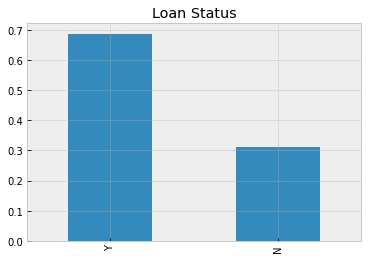

In [ ]:
plt.style.use('bmh')

train_df["Loan_Status"].value_counts(normalize=True).plot.bar(title='Loan Status')
train_df["Loan_Status"].value_counts()

**Predict Feature**

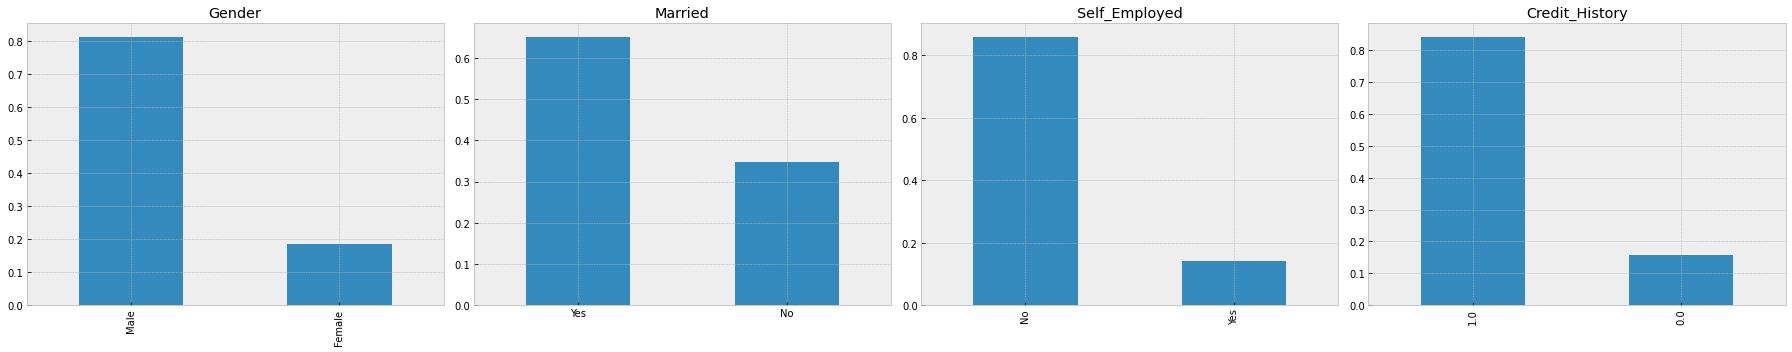

In [ ]:
fig1, ax1= plt.subplots(1,4)

train_df["Gender"].value_counts(normalize=True).plot.bar(figsize=(25,5),ax=ax1[0],title='Gender')
train_df["Married"].value_counts(normalize=True).plot.bar(ax=ax1[1],title='Married',rot=0)
train_df["Self_Employed"].value_counts(normalize=True).plot.bar(ax=ax1[2],title='Self_Employed')
train_df["Credit_History"].value_counts(normalize=True).plot.bar(ax=ax1[3],title='Credit_History')

fig1.tight_layout()

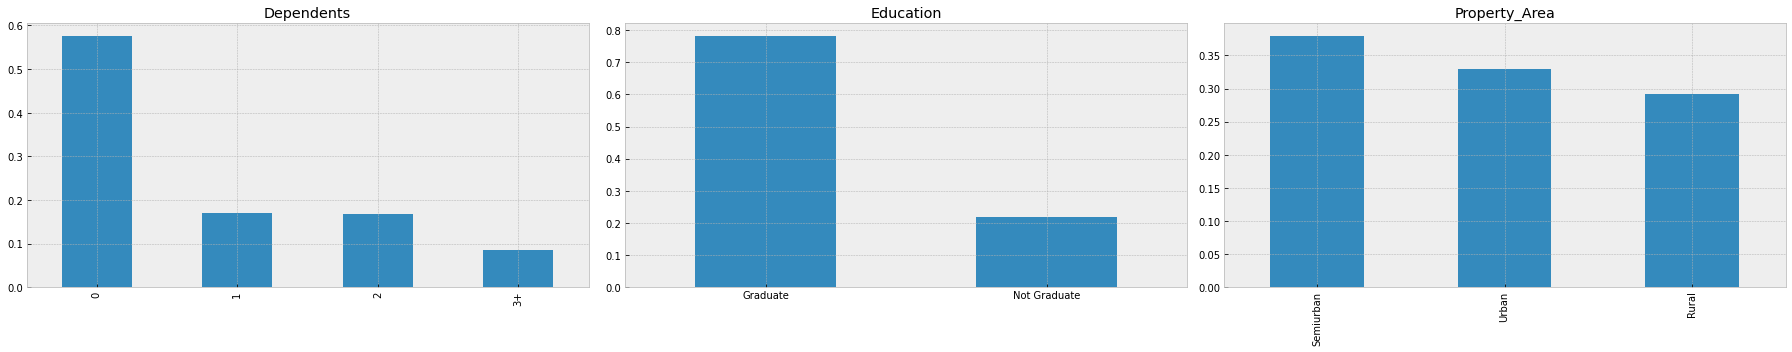

In [ ]:
fig1_2, ax1_2= plt.subplots(1,3)

train_df["Dependents"].value_counts(normalize=True).plot.bar(figsize=(25,5),ax=ax1_2[0],title='Dependents')
train_df["Education"].value_counts(normalize=True).plot.bar(ax=ax1_2[1],title='Education',rot=0)
train_df["Property_Area"].value_counts(normalize=True).plot.bar(ax=ax1_2[2],title='Property_Area')

fig1_2.tight_layout()

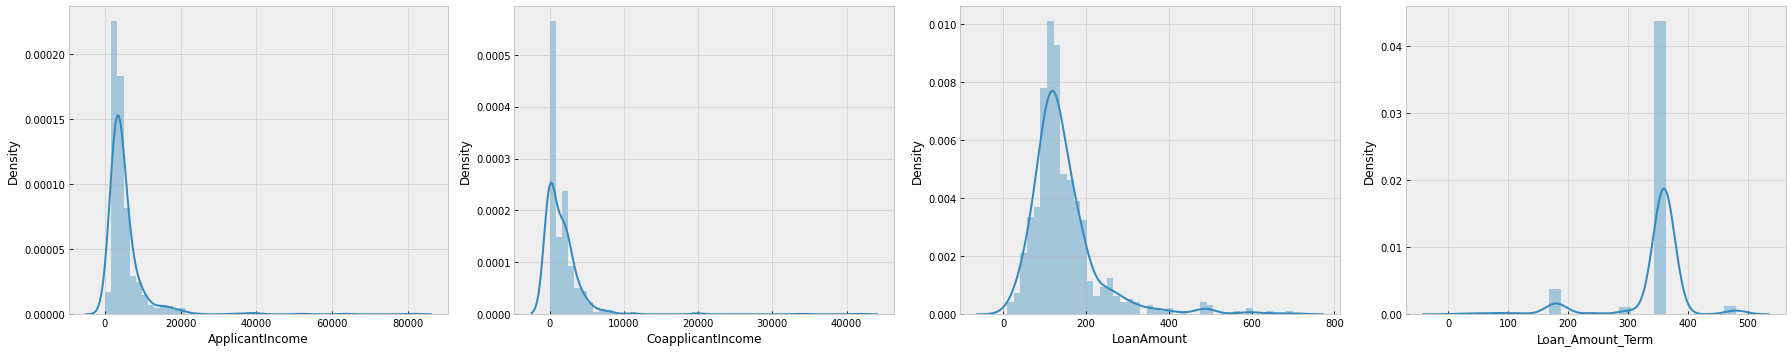

In [ ]:
fig2, ax2= plt.subplots(1,4,figsize=(25,5))

sns.distplot(train_df['ApplicantIncome'],ax=ax2[0])
sns.distplot(train_df['CoapplicantIncome'],ax=ax2[1])
sns.distplot(train_df['LoanAmount'],ax=ax2[2])
sns.distplot(train_df['Loan_Amount_Term'],ax=ax2[3])

fig2.tight_layout()

### ความสัมพันธ์ระหว่าง Target กับ Feature ต่างๆ


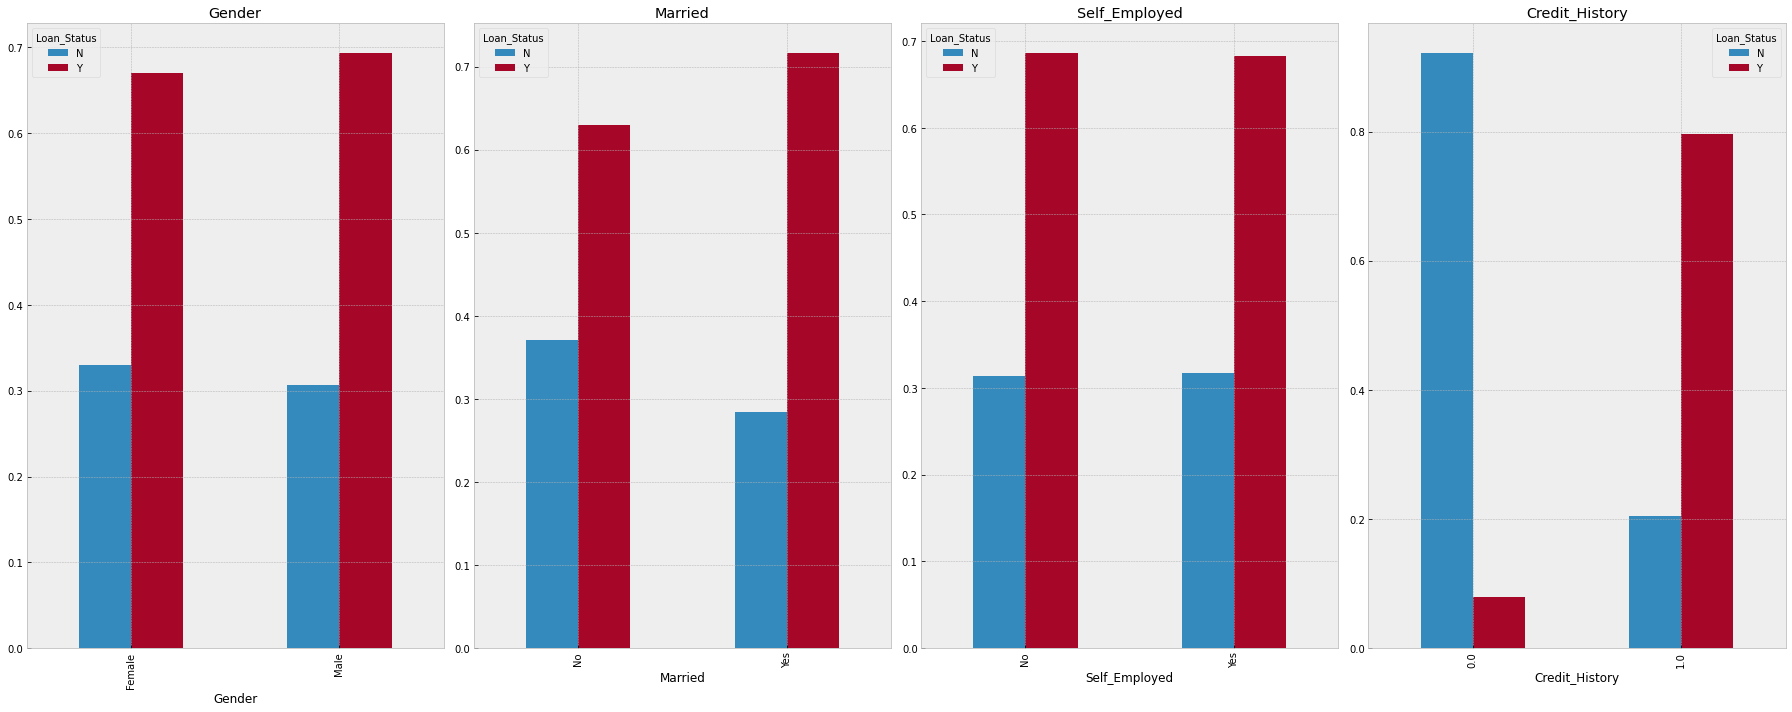

In [ ]:
fig4, ax4= plt.subplots(1,4)

Gender_T=pd.crosstab(train_df["Gender"],train_df["Loan_Status"],normalize=True)
Gender_T.div(Gender_T.sum(1),axis=0).plot.bar(figsize=(25,10),ax=ax4[0],title='Gender')

Married_T=pd.crosstab(train_df["Married"],train_df["Loan_Status"],normalize=True)
Married_T.div(Married_T.sum(1),axis=0).plot.bar(ax=ax4[1],title='Married')

Self_Employed_T=pd.crosstab(train_df["Self_Employed"],train_df["Loan_Status"])
Self_Employed_T.div(Self_Employed_T.sum(1),axis=0).plot.bar(ax=ax4[2],title='Self_Employed')

Credit_History_T=pd.crosstab(train_df["Credit_History"],train_df["Loan_Status"])
Credit_History_T.div(Credit_History_T.sum(1),axis=0).plot.bar(ax=ax4[3],title='Credit_History')

fig4.tight_layout()

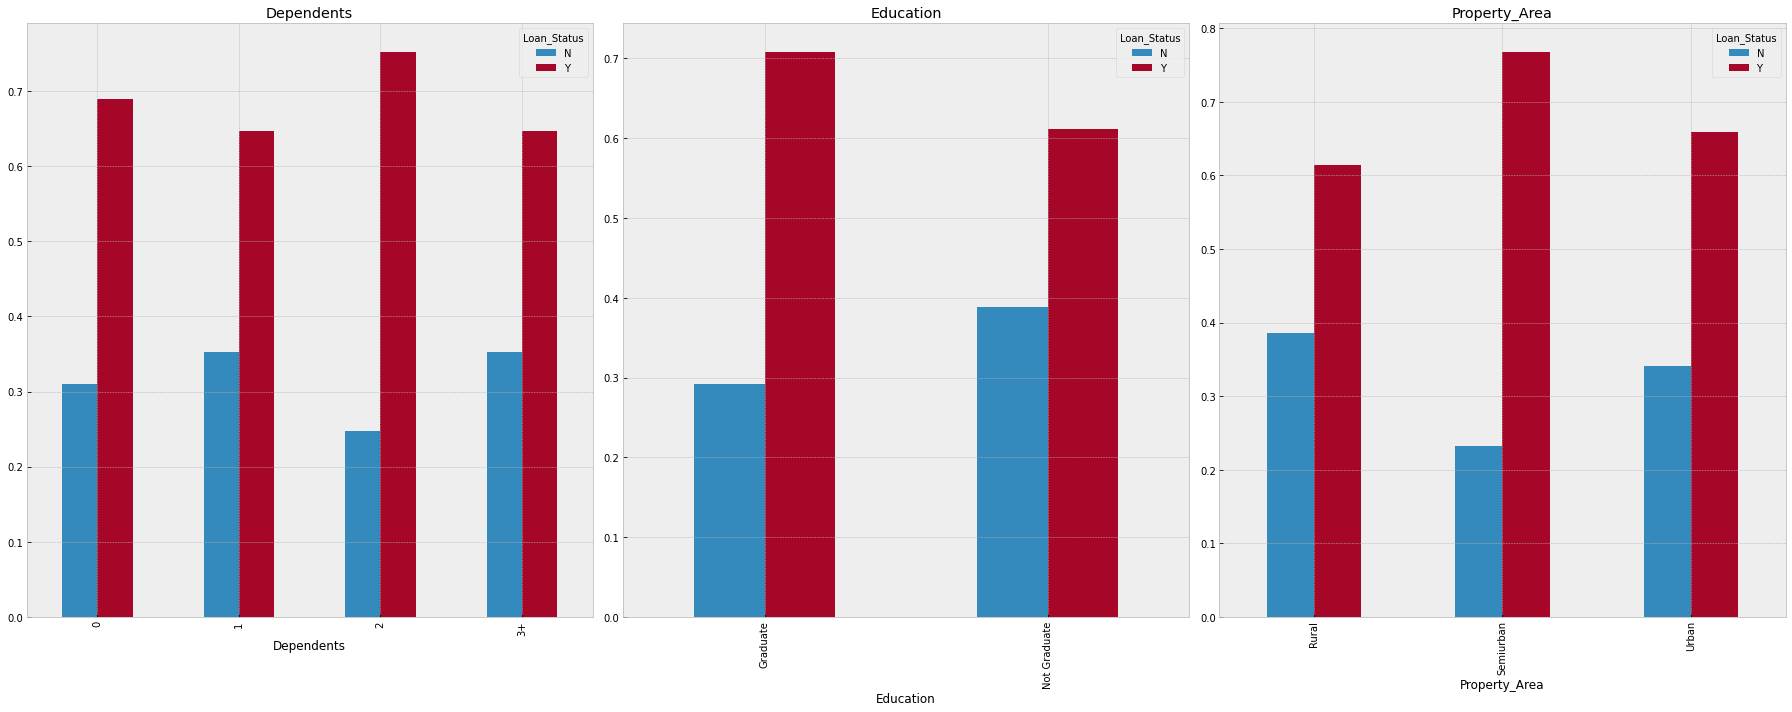

In [ ]:
fig5, ax5= plt.subplots(1,3)

Dependents_T=pd.crosstab(train_df["Dependents"],train_df["Loan_Status"])
Dependents_T.div(Dependents_T.sum(1),axis=0).plot.bar(figsize=(25,10),ax=ax5[0],title='Dependents')

Education_T=pd.crosstab(train_df["Education"],train_df["Loan_Status"])
Education_T.div(Education_T.sum(1),axis=0).plot.bar(ax=ax5[1],title='Education')

Property_Area_T=pd.crosstab(train_df["Property_Area"],train_df["Loan_Status"])
Property_Area_T.div(Property_Area_T.sum(1),axis=0).plot.bar(ax=ax5[2],title='Property_Area')

fig5.tight_layout()

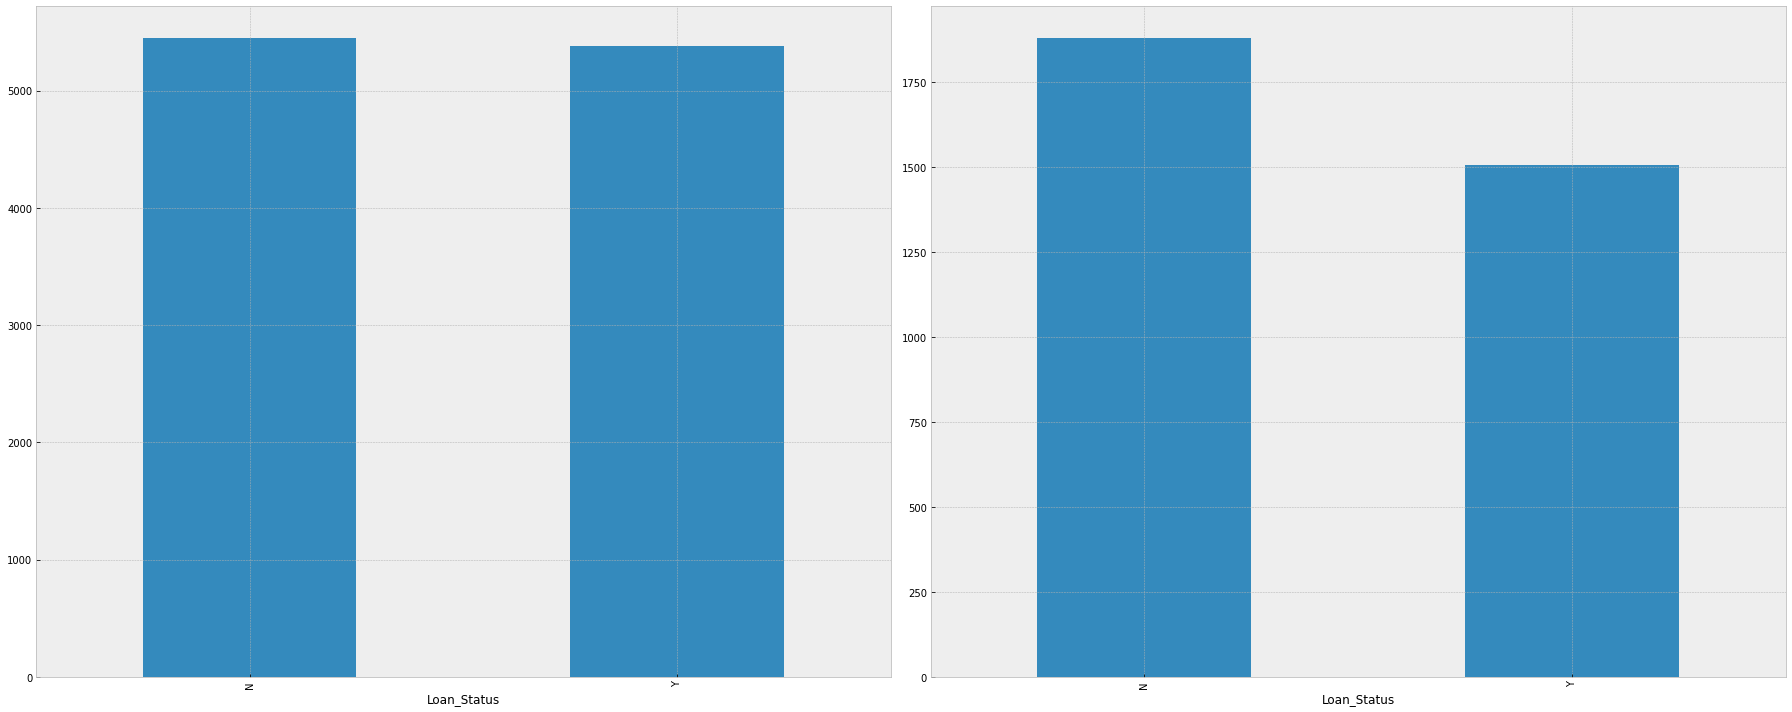

In [ ]:
fig6, ax6= plt.subplots(1,2)

ApplicantIncome_T = train_df.groupby("Loan_Status")['ApplicantIncome'].mean()
ApplicantIncome_T.plot.bar(figsize=(25,10),ax=ax6[0])

CoapplicantIncome_T = train_df.groupby("Loan_Status")['CoapplicantIncome'].mean()
CoapplicantIncome_T.plot.bar()

fig6.tight_layout()

### Outlier


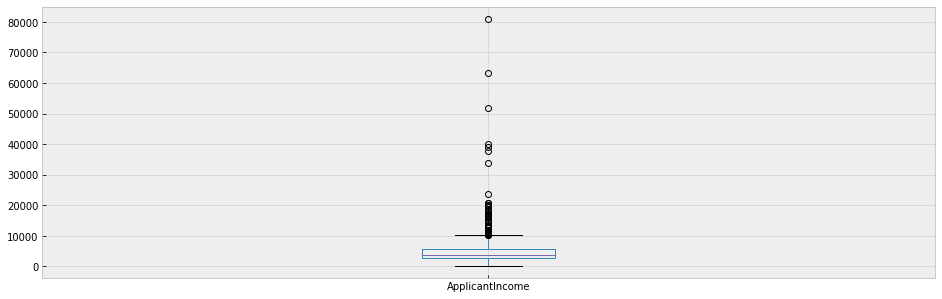

In [ ]:
train_df['ApplicantIncome'].plot.box(figsize=(16,5))
#พบค่า Outlier อยู่ใน ApplicantIncome โดยจะนำไปจัดการในส่วนต่อไป

In [ ]:
#มี 3 row ที่มากกว่า 50000 เลยนับเป็น Outlier ไป
train_df[train_df['ApplicantIncome'] > 50000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
333,LP002101,Male,Yes,0,Graduate,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


In [ ]:
#drop outlier โดยจำกัดค่า ApplicantIncome ให้สุดแค่ 50000
train_df = train_df[train_df['ApplicantIncome'] < 50000]

### Corration

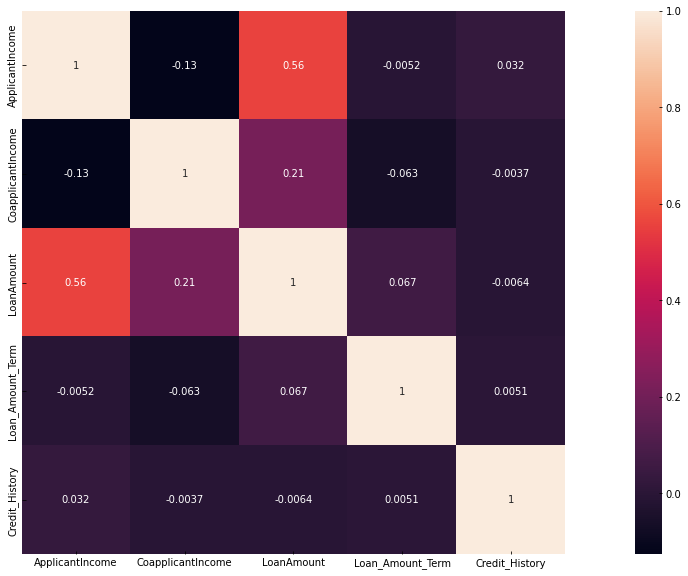

In [ ]:
f, ax = plt.subplots(figsize=(25,10))
sns.heatmap(train_df.corr(), square=True,annot=True);

# Clean Data : Train

In [ ]:
train_df
#row ลดลงจากการ drop outlier ไปก่อนหน้านี้

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,611.000000,611.000000,589.000000,597.000000,561.000000
mean,5109.040917,1629.206088,144.526316,342.311558,0.843137
std,4361.549063,2931.220236,80.990476,64.918251,0.363996
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2875.500000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1213.000000,127.000000,360.000000,1.000000
75%,5746.000000,2304.000000,166.000000,360.000000,1.000000
max,39999.000000,41667.000000,650.000000,480.000000,1.000000


In [ ]:
train_df.isnull().sum()

Loan_ID               0
Gender               12
Married               3
Dependents           15
Education             0
Self_Employed        31
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Fill null : Gender

In [ ]:
#มี null 12 row
train_df[train_df.Gender.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N
576,LP002872,NaN,Yes,0,Graduate,No,3087,2210.0,136.0,360.0,0.0,Semiurban,N


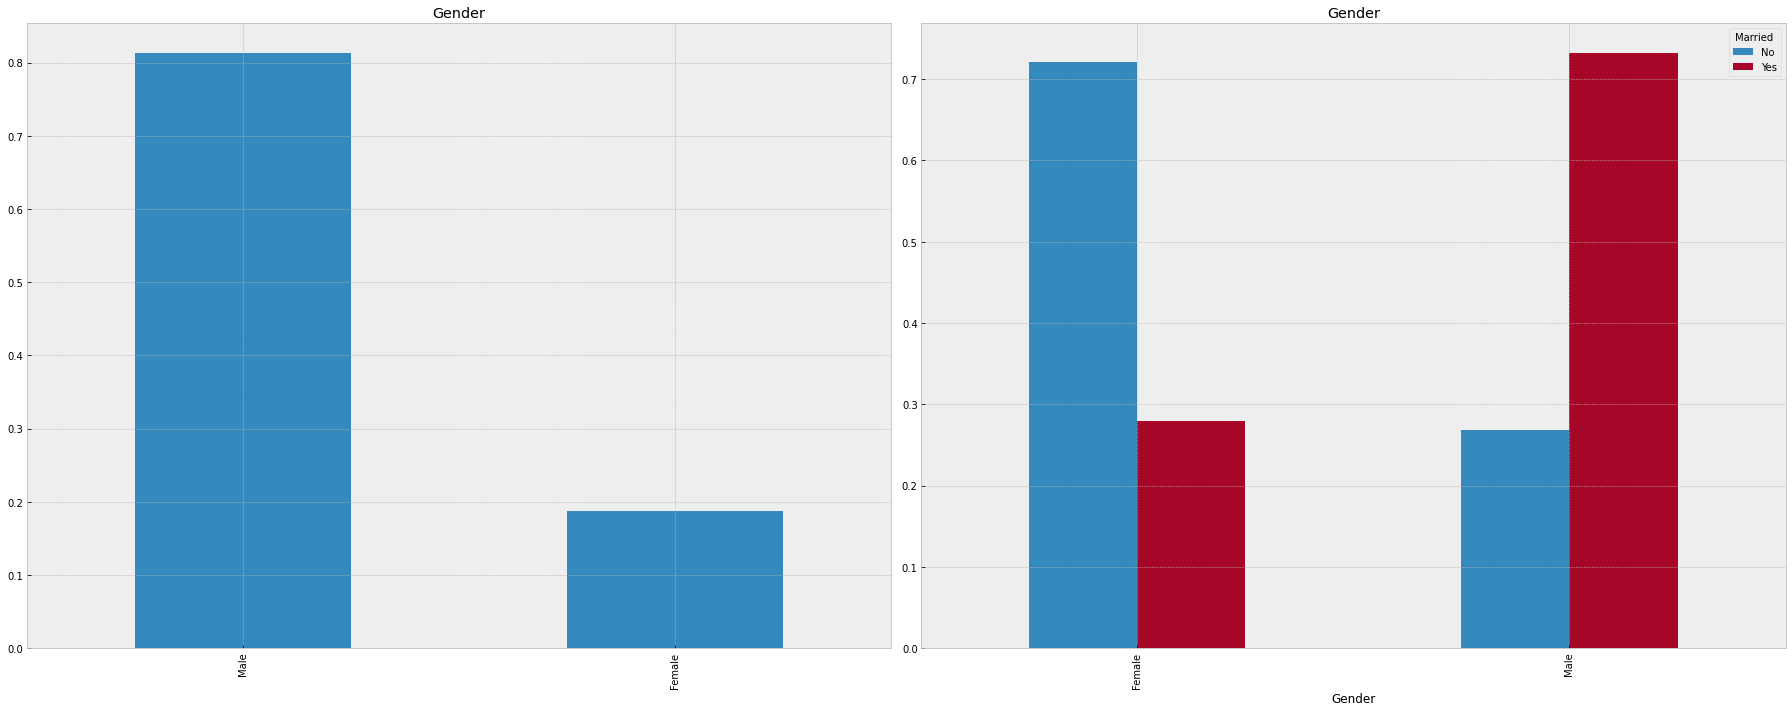

In [ ]:
figTrain_G, axTrain_G= plt.subplots(1,2)

train_df["Gender"].value_counts(normalize=True).plot.bar(figsize=(25,5),ax=axTrain_G[0],title='Gender')

Gender_M=pd.crosstab(train_df["Gender"],train_df["Married"],normalize=True)
Gender_M.div(Gender_M.sum(1),axis=0).plot.bar(figsize=(25,10),ax=axTrain_G[1],title='Gender')

figTrain_G.tight_layout()
#กราฟแสดงให้เห็นว่าผู้ชายส่วนใหญ่แต่งงานแล้ว จึงใช้เป็นตัวกำหนดในการ clean 

In [ ]:
#ในการ clean กำหนดให้ row ที่เป็น null และแต่งงานแล้วถือเป็นผู้ชาย และที่เหลือเป็นผู้หญิง
train_df.loc[(train_df.Gender.isnull())&(train_df.Married=='Yes'),'Gender'] = 'Male'
train_df.loc[(train_df.Gender.isnull())&(train_df.Married=='No'),'Gender'] = 'Female'
train_df[train_df.Gender.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


### Fill Null : Married          

In [ ]:
#มี null 3 row
train_df[train_df.Married.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [ ]:
#การ clean ในส่วนของ Married ใช้หลักการเดียวกับ Gender คือถ้าเป็นเพศเป็นชาย จะถือว่าแต่งงานแล้ว
train_df.loc[(train_df.Married.isnull())&(train_df.Gender=='Male'),'Married'] = 'Yes'
train_df.loc[(train_df.Married.isnull())&(train_df.Gender=='Female'),'Married'] = 'No'
train_df[train_df.Married.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


### Fill Null : Dependents       

In [ ]:
#เพื่อให้ clean ง่ายขึ้นเลยเปลี่ยน Dependents จาก obj เป็น int ก่อน
train_df["Dependents"] = train_df["Dependents"].map({"0": 0, "1": 1,"2": 2, "3+": 3})
test_df["Dependents"] = test_df["Dependents"].map({"0": 0, "1": 1,"2": 2, "3+": 3})

In [ ]:
#มี null 15 row
train_df[train_df.Dependents.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,Yes,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,Yes,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


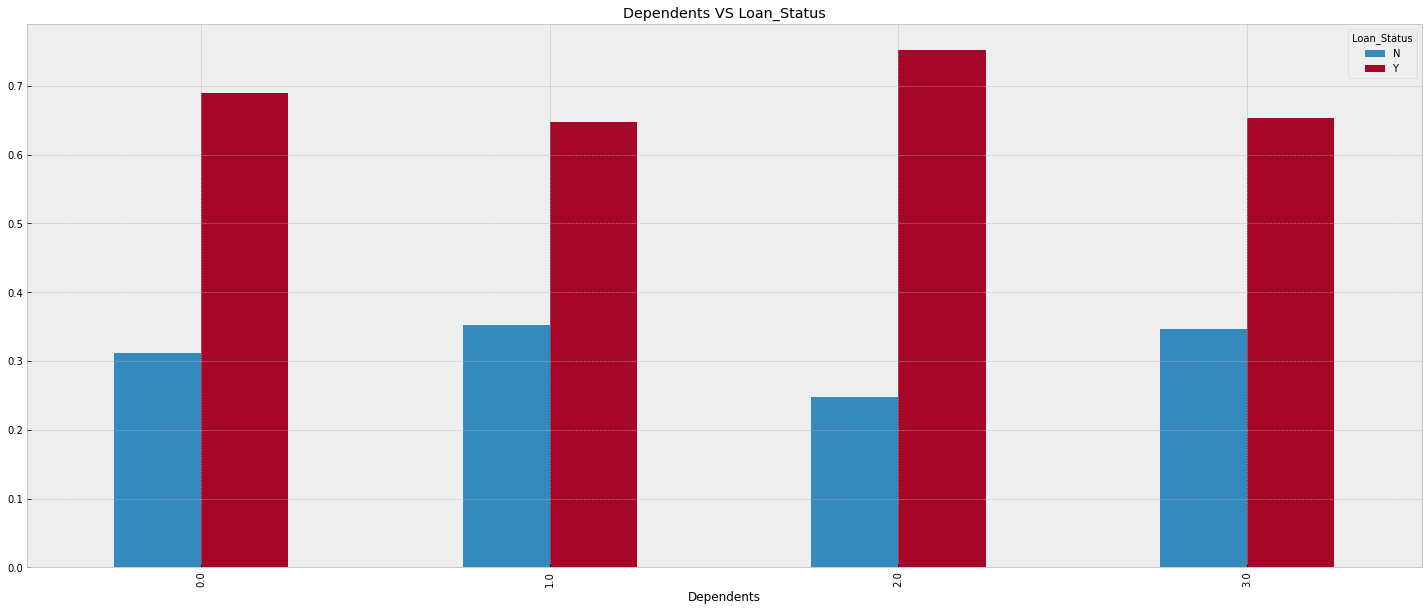

In [ ]:
DvsLS=pd.crosstab(train_df["Dependents"],train_df["Loan_Status"],normalize=True)
DvsLS.div(DvsLS.sum(1),axis=0).plot.bar(figsize=(25,10),title='Dependents VS Loan_Status')
#จากกราฟเห็นได้ว่าผู้ที่มี Dependents 2 คน มีโอกาศกู้เงินมากที่สุด และการมี Dependents 1 คนมีโอกาศกู้เงินน้อยที่สุด

In [ ]:
#จากที่กล่าวข้างต้นจึงให้ Dependents ที่เป็น null และ ได้การกู้เงิน มี Dependents 2 คน ค่าที่เหลือให้เป็น 1 คน
train_df.loc[(train_df.Dependents.isnull())&(train_df.Loan_Status=='Y'),'Dependents'] = 2
train_df.loc[(train_df.Dependents.isnull()),'Dependents'] = 1
train_df[train_df.Dependents.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


### Fill Null : Self_Employed     

In [ ]:
#มี null 31 row
train_df[train_df.Self_Employed.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,LP001027,Male,Yes,2.0,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,LP001041,Male,Yes,0.0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,LP001052,Male,Yes,1.0,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2.0,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1.0,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,LP001326,Male,No,0.0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
107,LP001370,Male,No,0.0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,LP001387,Female,Yes,0.0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,LP001398,Male,No,0.0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,LP001546,Male,No,0.0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y


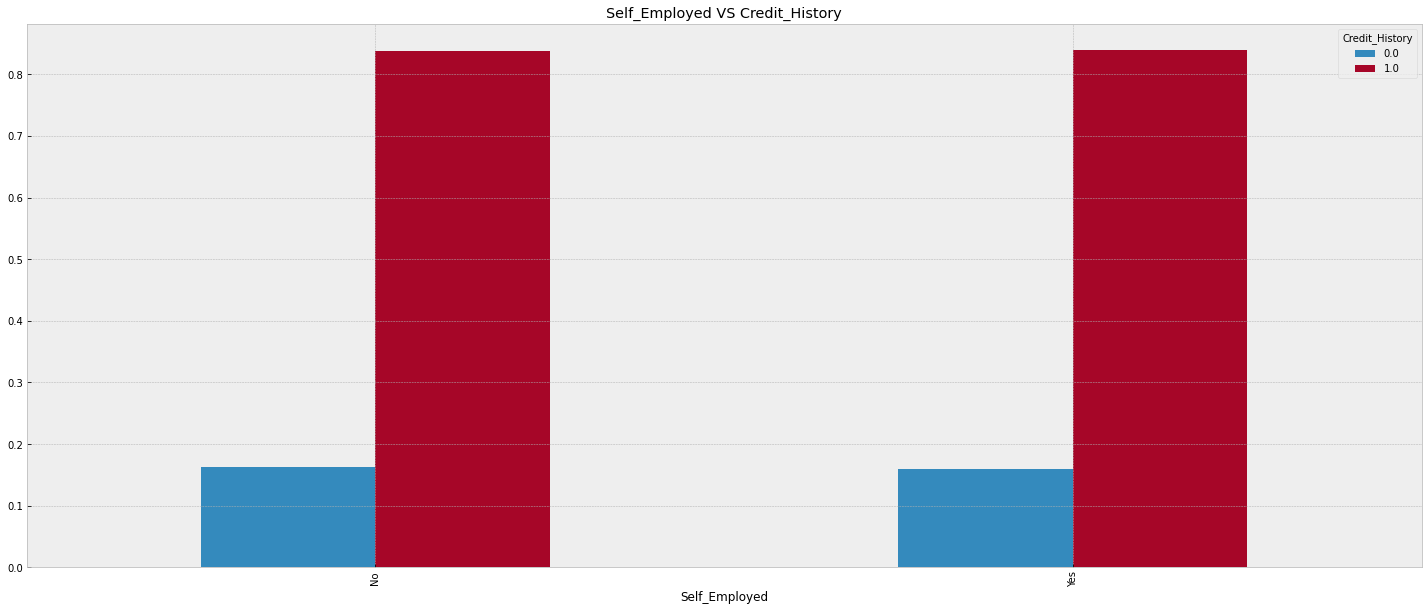

In [ ]:
SEvsLS=pd.crosstab(train_df["Self_Employed"],train_df["Credit_History"],normalize=True)
SEvsLS.div(SEvsLS.sum(1),axis=0).plot.bar(figsize=(25,10),title='Self_Employed VS Credit_History')

In [ ]:
SEvsLS
#จะเห็นได้ว่า freelancer มีโอกาศมีCredit_Historyผ่านเกณฑ์น้อยกว่า  ผู้ที่ทำงานกับบริษัท

Credit_History,0.0,1.0
Self_Employed,,
No,0.139925,0.720149
Yes,0.022388,0.117537


In [ ]:
#จึง fill ค่า Self_Employed ที่มี Credit_History ด้วย No และค่าที่เหลือเป็น Yes
train_df.loc[(train_df.Self_Employed.isnull())&(train_df.Credit_History==1.0),'Self_Employed'] = 'No'
train_df.loc[(train_df.Self_Employed.isnull()),'Self_Employed'] = 'Yes'
train_df[train_df.Self_Employed.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


### Fill Null : LoanAmount

In [ ]:
#มี null 22 row
train_df[train_df. LoanAmount.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0.0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1.0,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1.0,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0.0,Graduate,Yes,6782,0.0,NaN,360.0,NaN,Urban,N
102,LP001350,Male,Yes,2.0,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0.0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1.0,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,Male,No,0.0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,Male,Yes,3.0,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


In [ ]:
train_df["LoanAmount"].median()

127.0

In [ ]:
#Fill ด้วยค่า median คือ 127.0
train_df["LoanAmount"].fillna(train_df["LoanAmount"].mode()[0],inplace=True)
train_df["LoanAmount"].fillna(train_df["LoanAmount"].median(),inplace=True)

### Fill Null : Loan_Amount_Term     

In [ ]:
#มี null 14 row
train_df[train_df.Loan_Amount_Term.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,Male,Yes,0.0,Graduate,No,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,LP001109,Male,Yes,0.0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001136,Male,Yes,0.0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001137,Female,No,0.0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001250,Male,Yes,3.0,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,LP001391,Male,Yes,0.0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,LP001574,Male,Yes,0.0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,LP001669,Female,No,0.0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,LP001749,Male,Yes,0.0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,LP001770,Male,No,0.0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


In [ ]:
train_df["Loan_Amount_Term"].mode()[0]

360.0

In [ ]:
#ข้อมูลเป็นค่าจำเพาะจึง Fill ด้วยค่า mode คือ 360.0
train_df["Loan_Amount_Term"].fillna(train_df["Loan_Amount_Term"].mode()[0],inplace=True)

### Fill Null : Credit_History

In [ ]:
#มี null 50 row
train_df[train_df.Credit_History.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1.0,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
24,LP001052,Male,Yes,1.0,Graduate,Yes,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,LP001091,Male,Yes,1.0,Graduate,Yes,4166,3369.0,201.0,360.0,NaN,Urban,N
42,LP001123,Male,Yes,0.0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,LP001264,Male,Yes,3.0,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
83,LP001273,Male,Yes,0.0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
86,LP001280,Male,Yes,2.0,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
95,LP001326,Male,No,0.0,Graduate,Yes,6782,0.0,120.0,360.0,NaN,Urban,N
117,LP001405,Male,Yes,1.0,Graduate,No,2214,1398.0,85.0,360.0,NaN,Urban,Y
125,LP001443,Female,No,0.0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural,Y


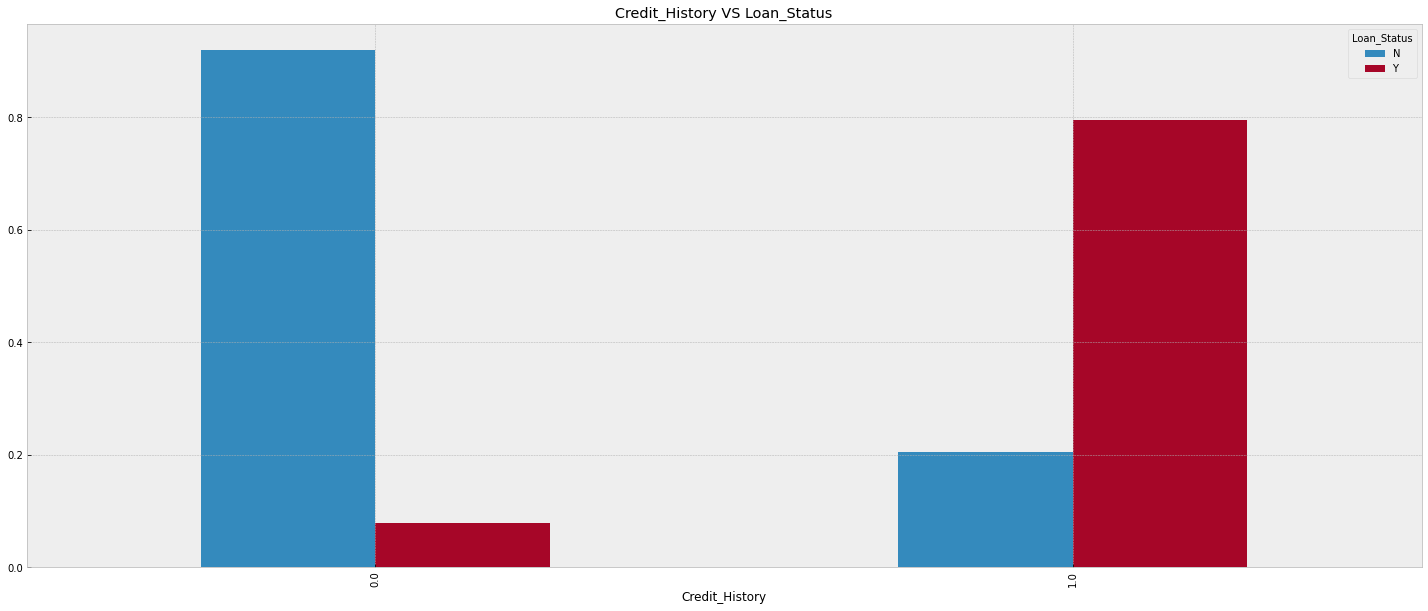

In [ ]:
CHvsLS=pd.crosstab(train_df["Credit_History"],train_df["Loan_Status"],normalize=True)
CHvsLS.div(CHvsLS.sum(1),axis=0).plot.bar(figsize=(25,10),title='Credit_History VS Loan_Status')
#การแสดงให้เห็นว่าผู้ที่มี Credit_Historyผ่านเกณฑจะกู้เงินได้ ส่วนคนที่ไม่มีแทบทั้งหมดถูกปฏิเสธการกู้

In [ ]:
#จึงถือผู้ที่มี Credit_History ได้รับการอนุมัติให้กู้ ส่วนคนที่ไม่มีก็ถูกปฏิเสธไป
train_df.loc[(train_df.Credit_History.isnull())&(train_df.Loan_Status=='Y'),'Credit_History'] = 1.0
train_df.loc[(train_df.Credit_History.isnull()),'Credit_History'] = 0.0
train_df[train_df.Credit_History.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [ ]:
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#Clean Data : Test

In [ ]:
test_df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,357.000000,367.000000,367.000000,362.000000,361.000000,338.000000
mean,0.829132,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,1.071302,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,0.000000,28.000000,6.000000,0.000000
25%,0.000000,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,2.000000,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,3.000000,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

### Fill Null : Gender

In [ ]:
#มี null 11 row
test_df[test_df.Gender.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
22,LP001128,NaN,No,0.0,Graduate,No,3909,0,101.0,360.0,1.0,Urban
51,LP001287,NaN,Yes,3.0,Not Graduate,No,3500,833,120.0,360.0,1.0,Semiurban
106,LP001563,NaN,No,0.0,Graduate,No,1596,1760,119.0,360.0,0.0,Urban
138,LP001769,NaN,No,NaN,Graduate,No,3333,1250,110.0,360.0,1.0,Semiurban
209,LP002165,NaN,No,1.0,Not Graduate,No,2038,4027,100.0,360.0,1.0,Rural
231,LP002298,NaN,No,0.0,Graduate,Yes,2860,2988,138.0,360.0,1.0,Urban
245,LP002355,NaN,Yes,0.0,Graduate,No,3186,3145,150.0,180.0,0.0,Semiurban
279,LP002553,NaN,No,0.0,Graduate,No,29167,0,185.0,360.0,1.0,Semiurban
296,LP002614,NaN,No,0.0,Graduate,No,6478,0,108.0,360.0,1.0,Semiurban
303,LP002657,NaN,Yes,1.0,Not Graduate,Yes,570,2125,68.0,360.0,1.0,Rural


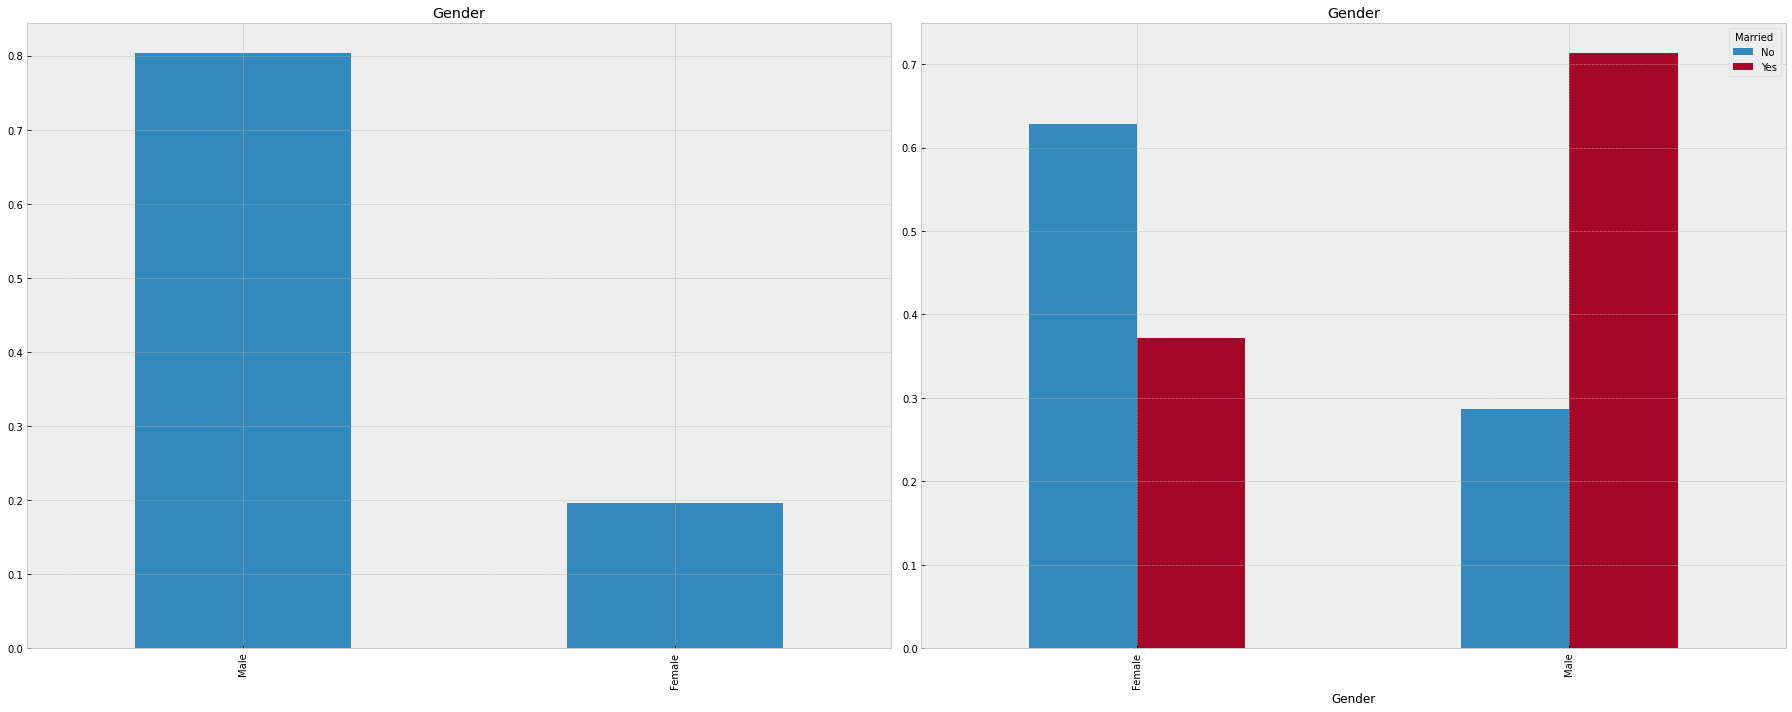

In [ ]:
figTest_G, axTest_G= plt.subplots(1,2)

test_df["Gender"].value_counts(normalize=True).plot.bar(figsize=(25,5),ax=axTest_G[0],title='Gender')

Gender_M=pd.crosstab(test_df["Gender"],test_df["Married"],normalize=True)
Gender_M.div(Gender_M.sum(1),axis=0).plot.bar(figsize=(25,10),ax=axTest_G[1],title='Gender')

figTest_G.tight_layout()
#เหมือนกับใน train สัดส่วนของผู้ชายที้แต่งงานแล้วมีมากกว่าผู้หญิง

In [ ]:
#จึงถือว่าหากแต่งงานแล้ว จะเป็นเพศชาย หากไม่จะเป็นเพศหญิง
test_df.loc[(test_df.Gender.isnull())&(test_df.Married=='Yes'),'Gender'] = 'Male'
test_df.loc[(test_df.Gender.isnull())&(test_df.Married=='No'),'Gender'] = 'Female'
test_df[test_df.Gender.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area


### Fill Null : Dependents

In [ ]:
#มี null 10 row
test_df[test_df.Dependents.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
46,LP001237,Male,Yes,NaN,Not Graduate,No,4163,1475,162.0,360.0,1.0,Urban
70,LP001366,Female,No,NaN,Graduate,No,3250,0,95.0,360.0,1.0,Semiurban
111,LP001587,Male,Yes,NaN,Graduate,No,4082,0,93.0,360.0,1.0,Semiurban
138,LP001769,Female,No,NaN,Graduate,No,3333,1250,110.0,360.0,1.0,Semiurban
202,LP002111,Male,Yes,NaN,Graduate,No,3016,1300,100.0,360.0,NaN,Urban
247,LP002360,Male,Yes,NaN,Graduate,No,10000,0,NaN,360.0,1.0,Urban
251,LP002385,Male,Yes,NaN,Graduate,No,3863,0,70.0,300.0,1.0,Semiurban
265,LP002441,Male,No,NaN,Graduate,No,3579,3308,138.0,360.0,NaN,Semiurban
302,LP002654,Female,No,NaN,Graduate,Yes,14987,0,177.0,360.0,1.0,Rural
312,LP002754,Male,No,NaN,Graduate,No,2066,2108,104.0,84.0,1.0,Urban


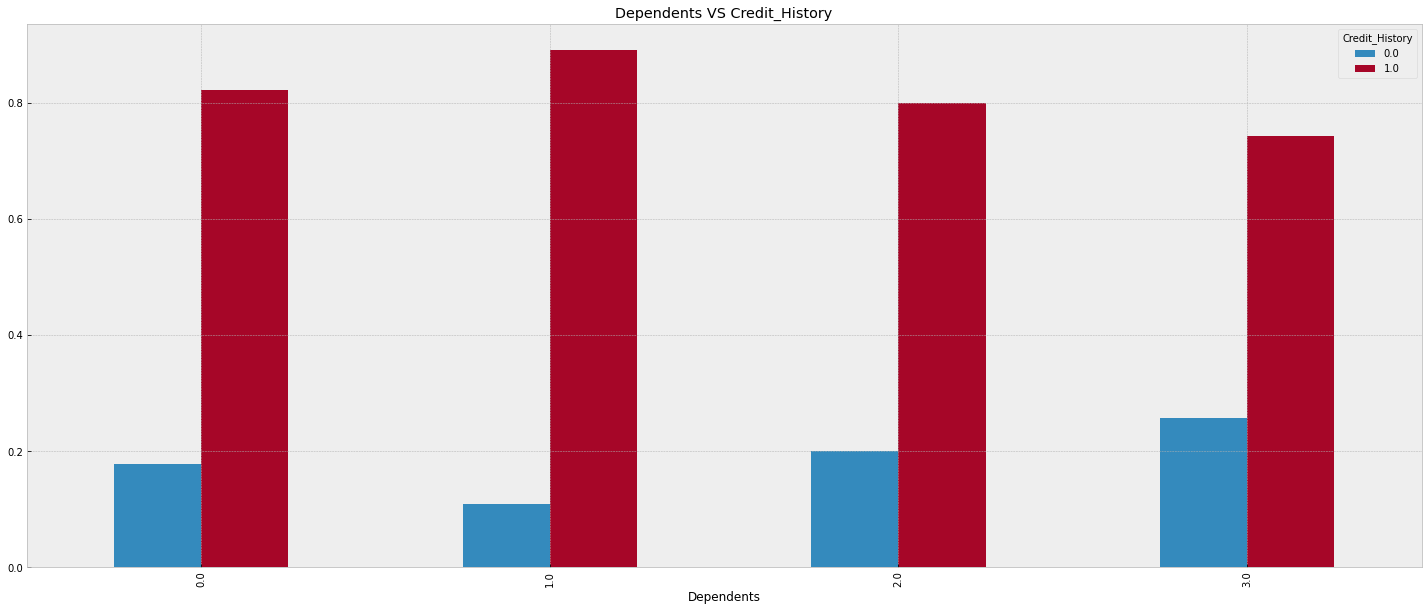

In [ ]:
test_DvsCH=pd.crosstab(test_df["Dependents"],test_df["Credit_History"],normalize=True)
test_DvsCH.div(test_DvsCH.sum(1),axis=0).plot.bar(figsize=(25,10),title='Dependents VS Credit_History')
#จากกราฟเห็นได้ว่าผู้ที่มี Dependents 1 คน มีโอกาศกู้เงินมากที่สุด และการมี Dependents 3 คนขึ้นไปมีโอกาศกู้เงินน้อยที่สุด

In [ ]:
#จากที่กล่าวข้างต้นจึงให้ Dependents ที่เป็น null และ ได้การกู้เงิน มี Dependents 1 คน ค่าที่เหลือให้เป็น 3 คน
test_df.loc[(test_df.Dependents.isnull())&(test_df.Credit_History==1.0),'Dependents'] = 1
test_df.loc[(test_df.Dependents.isnull()),'Dependents'] = 3
test_df[test_df.Dependents.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area


### Fill Null : Self_Employed

In [ ]:
#มี null 23 row
test_df[test_df.Self_Employed.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
8,LP001059,Male,Yes,2.0,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
11,LP001082,Male,Yes,1.0,Graduate,NaN,2185,1516,162.0,360.0,1.0,Semiurban
13,LP001094,Male,Yes,2.0,Graduate,NaN,12173,0,166.0,360.0,0.0,Semiurban
36,LP001208,Male,Yes,2.0,Graduate,NaN,7350,4029,185.0,180.0,1.0,Urban
72,LP001375,Male,Yes,1.0,Graduate,NaN,4083,1775,139.0,60.0,1.0,Urban
89,LP001472,Female,No,0.0,Graduate,NaN,5058,0,200.0,360.0,1.0,Rural
142,LP001789,Male,Yes,3.0,Not Graduate,NaN,6794,528,139.0,360.0,0.0,Urban
161,LP001906,Male,No,0.0,Graduate,NaN,2964,0,84.0,360.0,0.0,Semiurban
168,LP001950,Female,Yes,3.0,Graduate,NaN,1750,2935,94.0,360.0,0.0,Semiurban
175,LP001999,Male,Yes,2.0,Graduate,NaN,4912,4614,160.0,360.0,1.0,Rural


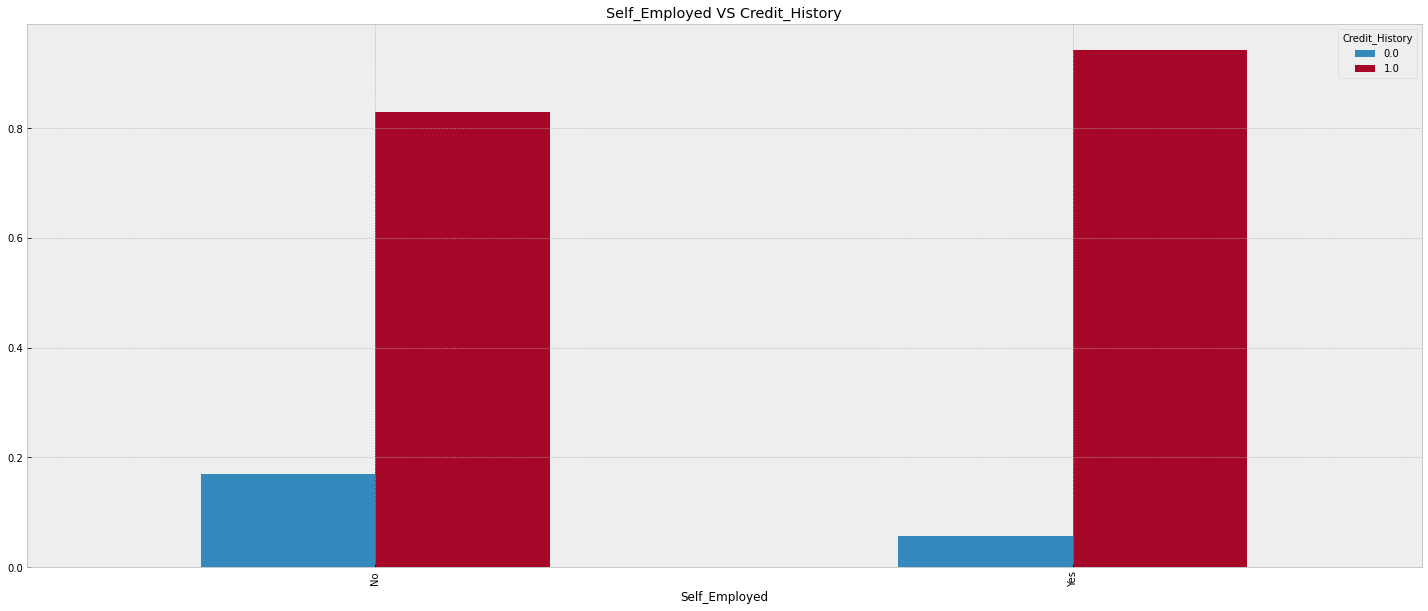

In [ ]:
test_SEvsCH=pd.crosstab(test_df["Self_Employed"],test_df["Credit_History"],normalize=True)
test_SEvsCH.div(test_SEvsCH.sum(1),axis=0).plot.bar(figsize=(25,10),title='Self_Employed VS Credit_History')

In [ ]:
test_SEvsCH
#จะเห็นได้ว่า freelancer มีโอกาศมีCredit_History น้อยกว่า  ผู้ที่ทำงานกับบริษัท

Credit_History,0.0,1.0
Self_Employed,,
No,0.151899,0.737342
Yes,0.006329,0.104430


In [ ]:
#จึง fill ค่า Self_Employed ที่มี Credit_History ด้วย No และค่าที่เหลือเป็น Yes
test_df.loc[(test_df.Self_Employed.isnull())&(test_df.Credit_History==1.0),'Self_Employed'] = 'No'
test_df.loc[(test_df.Self_Employed.isnull()),'Self_Employed'] = 'Yes'
test_df[test_df.Self_Employed.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area


### Fill Null : LoanAmount

In [ ]:
#มี null 5 row
test_df[test_df.LoanAmount.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
78,LP001415,Male,Yes,1.0,Graduate,No,3413,4053,NaN,360.0,1.0,Semiurban
101,LP001542,Female,Yes,0.0,Graduate,No,2262,0,NaN,480.0,0.0,Semiurban
188,LP002057,Male,Yes,0.0,Not Graduate,No,13083,0,NaN,360.0,1.0,Rural
247,LP002360,Male,Yes,1.0,Graduate,No,10000,0,NaN,360.0,1.0,Urban
289,LP002593,Male,Yes,1.0,Graduate,No,8333,4000,NaN,360.0,1.0,Urban


In [ ]:
test_df["LoanAmount"].median()

125.0

In [ ]:
#Fill ด้วยค่า median คือ 125.0
test_df["LoanAmount"].fillna(test_df["LoanAmount"].median(),inplace=True)

### Fill Null : Loan_Amount_Term 

In [ ]:
#มี null 6 row
test_df[test_df.Loan_Amount_Term.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
45,LP001232,Male,Yes,0.0,Graduate,No,4260,3900,185.0,NaN,NaN,Urban
48,LP001268,Male,No,0.0,Graduate,No,6792,3338,187.0,NaN,1.0,Urban
117,LP001611,Male,Yes,1.0,Graduate,No,1516,2900,80.0,NaN,0.0,Rural
129,LP001695,Male,Yes,1.0,Not Graduate,No,3321,2088,70.0,NaN,1.0,Semiurban
184,LP002045,Male,Yes,3.0,Graduate,No,10166,750,150.0,NaN,1.0,Urban
214,LP002183,Male,Yes,0.0,Not Graduate,No,3754,3719,118.0,NaN,1.0,Rural


In [ ]:
test_df["Loan_Amount_Term"].mode()[0]

360.0

In [ ]:
#Fill ด้วยค่า ทนกำ คือ 360.0

test_df["Loan_Amount_Term"].fillna(test_df["Loan_Amount_Term"].mode()[0],inplace=True)

### Fill Null : Credit_History

In [ ]:
#มี null 29 row
test_df[test_df.Credit_History.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
3,LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
12,LP001083,Male,No,3.0,Graduate,No,4166,0,40.0,180.0,NaN,Urban
26,LP001163,Male,Yes,2.0,Graduate,No,4363,1250,140.0,360.0,NaN,Urban
28,LP001174,Male,Yes,0.0,Graduate,No,3772,833,57.0,360.0,NaN,Semiurban
45,LP001232,Male,Yes,0.0,Graduate,No,4260,3900,185.0,360.0,NaN,Urban
90,LP001475,Male,Yes,0.0,Graduate,Yes,3188,2286,130.0,360.0,NaN,Rural
99,LP001527,Male,Yes,3.0,Graduate,No,6835,0,188.0,360.0,NaN,Semiurban
104,LP001558,Male,No,0.0,Graduate,No,2243,2233,107.0,360.0,NaN,Semiurban
115,LP001601,Male,No,3.0,Graduate,No,4243,4123,157.0,360.0,NaN,Semiurban
139,LP001771,Female,No,3.0,Graduate,No,4083,0,103.0,360.0,NaN,Semiurban


In [ ]:
#ด้วยการที่ไม่มี column  Loan_Status ใน train จึง fill ด้วยค่า mode ไปเลย
test_df['Credit_History'].fillna(test_df['Credit_History'].value_counts().index[0], inplace=True)

In [ ]:
test_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Pre Process

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            611 non-null    object 
 1   Gender             611 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         611 non-null    float64
 4   Education          611 non-null    object 
 5   Self_Employed      611 non-null    object 
 6   ApplicantIncome    611 non-null    int64  
 7   CoapplicantIncome  611 non-null    float64
 8   LoanAmount         611 non-null    float64
 9   Loan_Amount_Term   611 non-null    float64
 10  Credit_History     611 non-null    float64
 11  Property_Area      611 non-null    object 
 12  Loan_Status        611 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 66.8+ KB


In [ ]:
#เปลี่ยนค่าต่างๆให้อยู่ในรูป 0,1,2 (Dependents ทำไปก่อนหน้านี้แล้ว)
train_df["Gender"] = train_df["Gender"].map({"Male":0,"Female":1})

train_df["Married"] = train_df["Married"].map({"Yes":1,"No":0})

train_df["Education"] = train_df["Education"].map({"Graduate":1,"Not Graduate":0})

train_df["Self_Employed"] = train_df["Self_Employed"].map({"Yes":1,"No":0})

train_df["Property_Area"] = train_df["Property_Area"].map({"Rural":0, "Semiurban":1, "Urban": 2,})

train_df["Loan_Status"] = train_df["Loan_Status"].map({"Y":1,"N":0})

In [ ]:
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0.0,1,0,5849,0.0,120.0,360.0,1.0,2,1
1,LP001003,0,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0.0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,0,1,3.0,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,0,1,1.0,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,0,1,2.0,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    float64
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 34.5+ KB


In [ ]:
test_df["Gender"] = test_df["Gender"].map({"Male":0,"Female":1})

test_df["Married"] = test_df["Married"].map({"Yes":1,"No":0})

test_df["Education"] = test_df["Education"].map({"Graduate":1,"Not Graduate":0})

test_df["Self_Employed"] = test_df["Self_Employed"].map({"Yes":1,"No":0})

test_df["Property_Area"] = test_df["Property_Area"].map({"Rural":0, "Semiurban":1, "Urban": 2,})


#Add more feature

In [ ]:
#เพิ่ม Feature มาอีก 4 feature คือ
#total_income เกิดจากผลรวมของรายรับของทั้งผู้กู้และคนค้ำ
train_df['total_income'] = train_df['ApplicantIncome'] + train_df['CoapplicantIncome']

#total_income_by_LoanAmount เกิดจาก total_income หารด้วย LoanAmount
train_df['total_income_by_LoanAmount'] = train_df['total_income'] / train_df['LoanAmount']
#ApplicantIncome_by_LoanAmount เกิดจาก ApplicantIncome หารด้วย ApplicantIncome
train_df['ApplicantIncome_by_LoanAmount'] = train_df['ApplicantIncome'] / train_df['LoanAmount']
#Loan_Amount_Term_By_LoanAmount เกิดจาก LoanAmount หารด้วย Loan_Amount_Term
train_df['Loan_Amount_Term_By_LoanAmount'] = train_df['LoanAmount'] / train_df['Loan_Amount_Term']

#เนื่องจากมี total_income แล้วจึง drop ApplicantIncome และ CoapplicantIncome ลงไปได้
train_df.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)


In [ ]:
#เพิ่ม Feature มาอีก 4 feature เหมือนกับ Train 
test_df['total_income'] = test_df['ApplicantIncome'] + test_df['CoapplicantIncome']
test_df['total_income_by_LoanAmount'] = test_df['total_income'] / test_df['LoanAmount']
test_df['ApplicantIncome_by_LoanAmount'] = test_df['ApplicantIncome'] / test_df['LoanAmount']
test_df['Loan_Amount_Term_By_LoanAmount'] = test_df['LoanAmount'] / test_df['Loan_Amount_Term']

test_df.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)



Corration

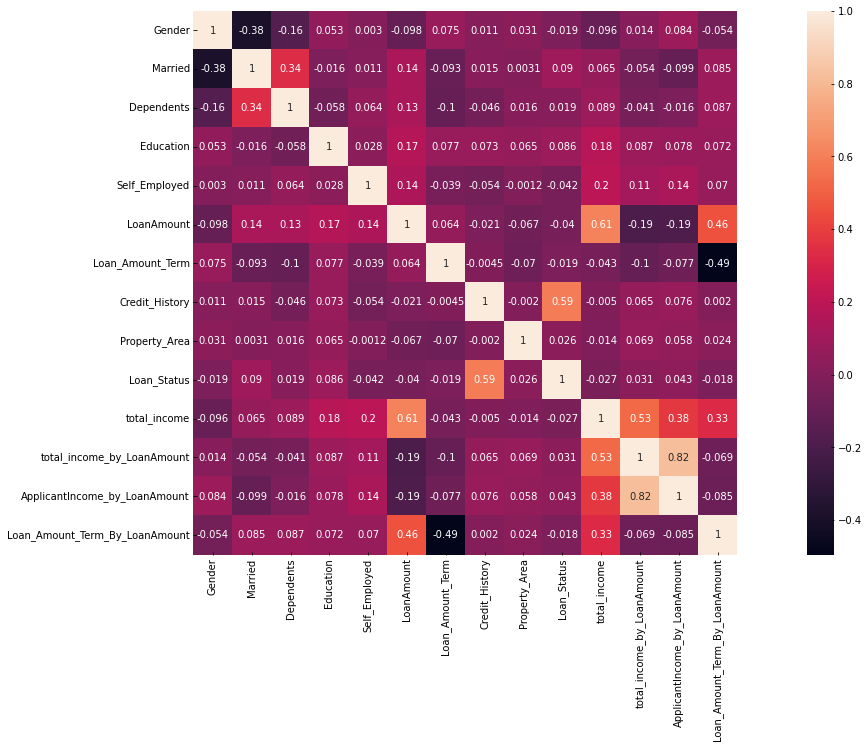

In [ ]:
f, ax = plt.subplots(figsize=(25,10))
sns.heatmap(train_df.corr(), square=True,annot=True);

# train test split


In [ ]:
#ลบ Loan_ID จากทั้ง train และ test 
try:
  del train_df['Loan_ID']
  del test_df['Loan_ID']
except:
    pass

In [ ]:
X = train_df.drop(['Loan_Status'], axis = 1 )
y = train_df['Loan_Status']

#แยก train_test_split ด้วยขนาด 80:20 และใช้ random_state ที่ 3 ซึ่งเป็น random_state ที่ดีที่สุดจากที่ทดลองมา
X_train ,X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20 , random_state =3)

# Select Machine learning to start with

ทดสอบหาโมเดลที่ดีที่สุดโดยใช้ ทดสอบจากทั้ง 12 โมเดล

In [ ]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train , y_train)
pred_lr = lr.predict(X_test)
predic_lr = lr.predict(test_df)

In [ ]:
#Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train , y_train)
pred_lda = lda.predict(X_test)

predic_lda = lda.predict(test_df)

In [ ]:
#XGBoost
xgb = XGBClassifier()
xgb.fit(X_train , y_train)
pred_xgb = xgb.predict(X_test)

predic_xgb = xgb.predict(test_df)

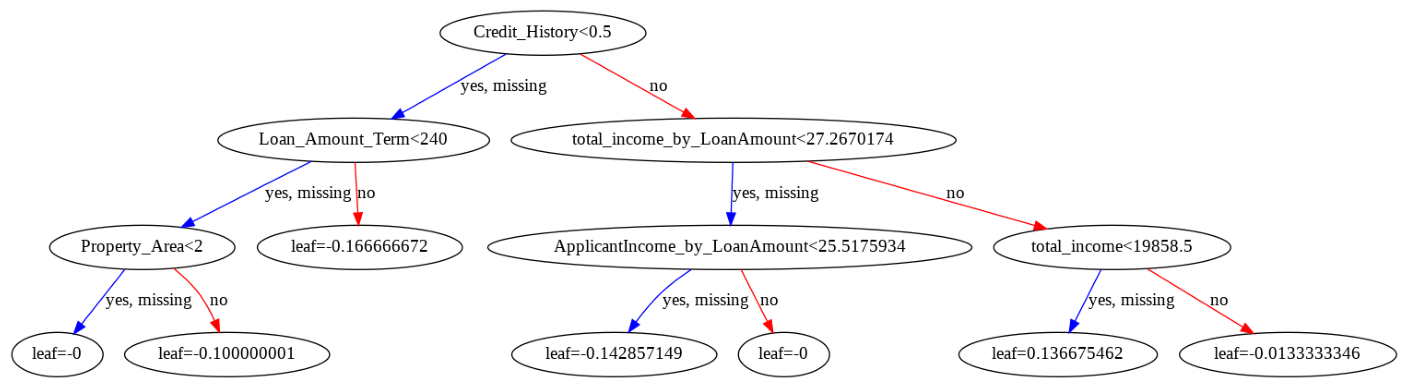

In [ ]:
plot_tree(xgb)
fig = plt.gcf()
fig.set_size_inches(25, 10)

In [ ]:
#Naive Bayes
nb = GaussianNB()
nb.fit(X_train , y_train)
pred_nb = nb.predict(X_test)

predic_nb = nb.predict(test_df)

In [ ]:
#K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train , y_train)
pred_knn = knn.predict(X_test)

predic_knn = knn.predict(test_df)

In [ ]:
#Random Forest
rf = RandomForestClassifier()
rf.fit(X_train , y_train)
pred_rf = rf.predict(X_test)

predic_rf = rf.predict(test_df)

In [ ]:
#AdaBoost
ada = AdaBoostClassifier()
ada.fit(X_train , y_train)
pred_ada = ada.predict(X_test)

predic_ada = ada.predict(test_df)

In [ ]:
#gradient boosting machine
gbm = GradientBoostingClassifier()
gbm.fit(X_train , y_train)
pred_gbm = gbm.predict(X_test)

predic_gbm = gbm.predict(test_df)

In [ ]:
#Support Vector Machines (SVM)
svm =  SVC(probability=True)
svm.fit(X_train , y_train)
pred_svm = svm.predict(X_test)

predic_svm = svm.predict(test_df)

In [ ]:
#Support Vector Machines (SVM) ft. StandardScaler
svmSS = make_pipeline(StandardScaler(), SVC(probability=True))
svmSS.fit(X_train , y_train)
pred_svmSS = svmSS.predict(X_test)

predic_svmSS = svmSS.predict(test_df)

In [ ]:
#LightGBM 
try:
  lgb = lgb.LGBMClassifier()
except:
    pass
lgb.fit(X_train , y_train)
pred_lgb = lgb.predict(X_test)

predic_lgb = lgb.predict(test_df)

In [ ]:
#Logistic Regression
CB = CatBoostClassifier()
CB.fit(X_train , y_train)
pred_CB = CB.predict(X_test)
predic_CB = CB.predict(test_df)

Learning rate set to 0.007584
0:	learn: 0.6881668	total: 48.3ms	remaining: 48.3s
1:	learn: 0.6837083	total: 50.3ms	remaining: 25.1s
2:	learn: 0.6785510	total: 52ms	remaining: 17.3s
3:	learn: 0.6736386	total: 53.8ms	remaining: 13.4s
4:	learn: 0.6690635	total: 55.6ms	remaining: 11.1s
5:	learn: 0.6645379	total: 57.3ms	remaining: 9.49s
6:	learn: 0.6599266	total: 59ms	remaining: 8.38s
7:	learn: 0.6556141	total: 60.9ms	remaining: 7.55s
8:	learn: 0.6519012	total: 61.7ms	remaining: 6.8s
9:	learn: 0.6478781	total: 63.5ms	remaining: 6.28s
10:	learn: 0.6440337	total: 65.3ms	remaining: 5.87s
11:	learn: 0.6398389	total: 67ms	remaining: 5.52s
12:	learn: 0.6361977	total: 68.1ms	remaining: 5.17s
13:	learn: 0.6326080	total: 69.8ms	remaining: 4.91s
14:	learn: 0.6287782	total: 71.1ms	remaining: 4.67s
15:	learn: 0.6249808	total: 72.9ms	remaining: 4.48s
16:	learn: 0.6212425	total: 74.6ms	remaining: 4.32s
17:	learn: 0.6174575	total: 76.4ms	remaining: 4.17s
18:	learn: 0.6140204	total: 78.2ms	remaining: 4.04s

feature importance

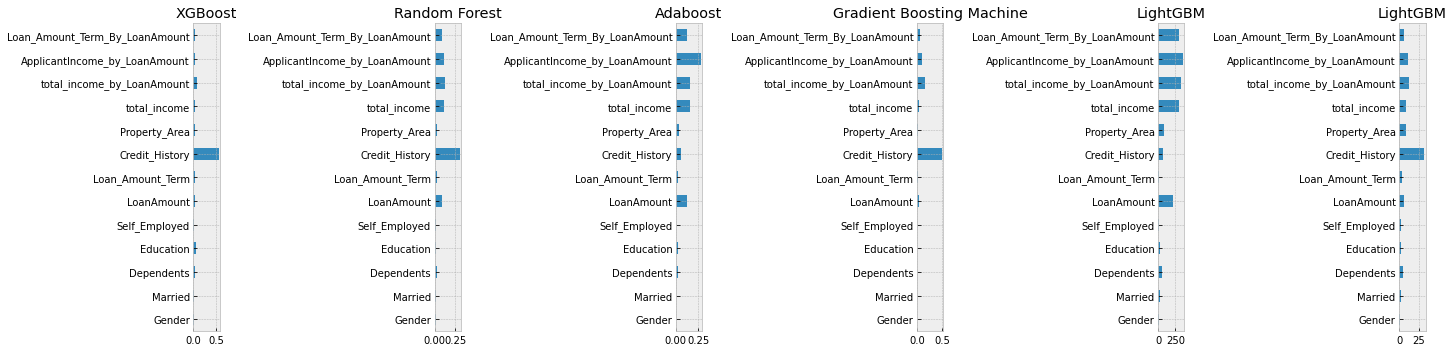

In [ ]:
#plot กราฟดูความสำคัญของ feature ต่างๆ โดยมีโมเดลที่รับรอง .feature_importances_ อยู่ 6 โมเดล
fig6, ax6= plt.subplots(1,6)
importances_xgb = pd.Series(xgb.feature_importances_,index=X.columns)
importances_xgb.plot.barh(figsize=(20,5),ax=ax6[0],title='XGBoost')

importances_rf = pd.Series(rf.feature_importances_,index=X.columns)
importances_rf.plot.barh(ax=ax6[1],title='Random Forest')

importances_ada = pd.Series(ada.feature_importances_,index=X.columns)
importances_ada.plot.barh(ax=ax6[2],title='Adaboost')

importances_gbm = pd.Series(gbm.feature_importances_,index=X.columns)
importances_gbm.plot.barh(ax=ax6[3],title='Gradient Boosting Machine')

importances_lgb = pd.Series(lgb.feature_importances_,index=X.columns)
importances_lgb.plot.barh(ax=ax6[4],title='LightGBM')

importances_lgb = pd.Series(CB.feature_importances_,index=X.columns)
importances_lgb.plot.barh(ax=ax6[5],title='LightGBM')
fig6.tight_layout()
#จากการฟจะเห็นได้ว่า Credit_History มีความสำคัญต่อโมเดลมากที่สุด

Auc and Accuracy test

In [ ]:
#ทำการตรวจสอบความแม่นยำโดยใช้ area under the curve score และ Accuracy score
ml = [lr, lda, xgb, nb,knn,rf,ada,gbm,svm,svmSS,lgb,CB]
ml_name = ['Linear Regression','Linear Discriminant Analysis','XGBoost','Naive Bayes','AdaBoost','K-Nearest Neighbors (KNN)','Random Forest','AdaBoost','gradient boosting machine','Support Vector Machines (SVM)','SVM ft. StandardScaler','Catboost']
new_auc_score = []
Best_auc_score = 0
Best_auc_ML = 0

new_acc_score = []
Best_acc_score = 0
Best_acc_ML = 0
for i in ml:
  pred_prob = i.predict_proba(X_test)
  fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)

  random_probs = [0 for i in range(len(y_test))]
  auc_score = roc_auc_score(y_test, pred_prob[:,1])
  new_auc_score.append(auc_score)
  if auc_score > Best_auc_score:
    Best_auc_score = auc_score
    Best_auc_ML = i
  
  acc_Pred = i.predict(X_test)
  new_acc_score.append(accuracy_score(acc_Pred, y_test))
  if accuracy_score(acc_Pred, y_test) > Best_acc_score:
    Best_acc_score = accuracy_score(acc_Pred, y_test)
    Best_acc_ML = i

score_df = pd.DataFrame(list(zip(ml_name, new_auc_score, new_acc_score)),columns=['Name','Auc Score', 'Accuracy'])
score_df

,Name,Auc Score,Accuracy
0,Linear Regression,0.726371,0.821138
1,Linear Discriminant Analysis,0.704230,0.829268
2,XGBoost,0.698116,0.796748
3,Naive Bayes,0.684402,0.813008
4,AdaBoost,0.573364,0.634146
5,K-Nearest Neighbors (KNN),0.694151,0.804878
6,Random Forest,0.666226,0.788618
7,AdaBoost,0.672835,0.813008
8,gradient boosting machine,0.426305,0.723577
9,Support Vector Machines (SVM),0.717779,0.829268


In [ ]:
print("Best AUC Score = " ,Best_auc_score)
print("Best AUC ML = " ,Best_auc_ML)
print("Best ACC Score = " ,Best_acc_score)
print("Best ACC ML = " ,Best_acc_ML)

Best AUC Score =  0.7372769332452082
Best AUC ML =  LGBMClassifier()
Best ACC Score =  0.8292682926829268
Best ACC ML =  LinearDiscriminantAnalysis()


จากการนำผลลัพธ์ของแต่ละโมเดลไปตรวจใน datahack พบว่า XGBoost  และ CatBoost ดีที่สุด โดยได้คะแนนถึง 0.8125

XGBoost</br>
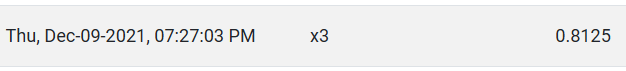

Catboost</br>
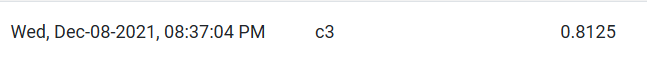

#eXtreme Gradient Boosting Hyperparameter Tuning


ในขั้นตอนสุดท้ายเราเลือกให้ XGBoost เป็นโมเดลหลัก และนำมาทำ Hyperparameter Tuning โดยใช้ GridSearchCV และ RandomizedSearchCV

In [ ]:
#tuning model ด้วย parameter ตามข้างล่างโดยอิงจากค่า default และค่าที่ดีที่สุดจาดที่เคยทดลองมา
params = {"colsample_bytree" : [0.7,0.8,1],
          "eta" : [0.01],
          "gamma": [0.3,0,1,5],
          'learning_rate': [0.1,0.01],
          "max_depth": [3,6],
          "min_child_weight" : [ 3 ],
          "subsample" : [0.7,0.8,1],
        }
#สำหรับ XGBoost จะ tune ด้วย GridSearchCV และ RandomizedSearchCV
#Parameter ที่ดีที่สุดที่เคยทดลองมา 
#best GS
#{'subsample': 0.7, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.3, 'eta': 0.01, 'colsample_bytree': 0.7}
#{'subsample': 1, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0.3, 'eta': 0.01, 'colsample_bytree': 1}

#Best RS
#{'subsample': 0.7, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.3, 'eta': 0.01, 'colsample_bytree': 0.7}//Best
#{'colsample_bytree': 0.7, 'eta': 0.01, 'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'subsample': 0.7}
#{'colsample_bytree': 0.7, 'eta': 0.01, 'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'subsample': 0.7}

In [ ]:
#tune ด้วย GridSearchCV และ ทดสอบคะแนนด้วย Mean Squared Error
clf_gs = GridSearchCV(estimator=xgb, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=2)
clf_gs.fit(X, y)

print("Best parameters:", clf_gs.best_params_)
print("Lowest MSE: ", (-clf_gs.best_score_)**(1/2.0))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END colsample_bytree=0.7, eta=0.01, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.01, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.01, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.01, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.01, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.01, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, eta=0.01, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3, subsa

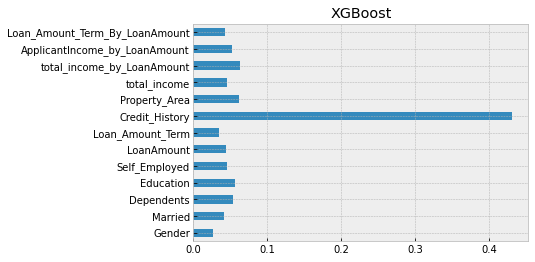

In [ ]:
#โมเดลที่มารองรับ Parameter จาก GridSearchCV
#โมเดลหลัก
gbtree_params = clf_gs.best_params_
xgb_1 = XGBClassifier(**clf_gs.best_params_)
xgb_1.fit(X_train , y_train)
pred_xgb_1 = xgb_1.predict(X_test)

predic_xgb_1 = xgb_1.predict(test_df)

#plot กราฟแสดง feature importances
importances_xgb_1 = pd.Series(xgb_1.feature_importances_,index=X.columns)
importances_xgb_1.plot.barh(title='XGBoost')

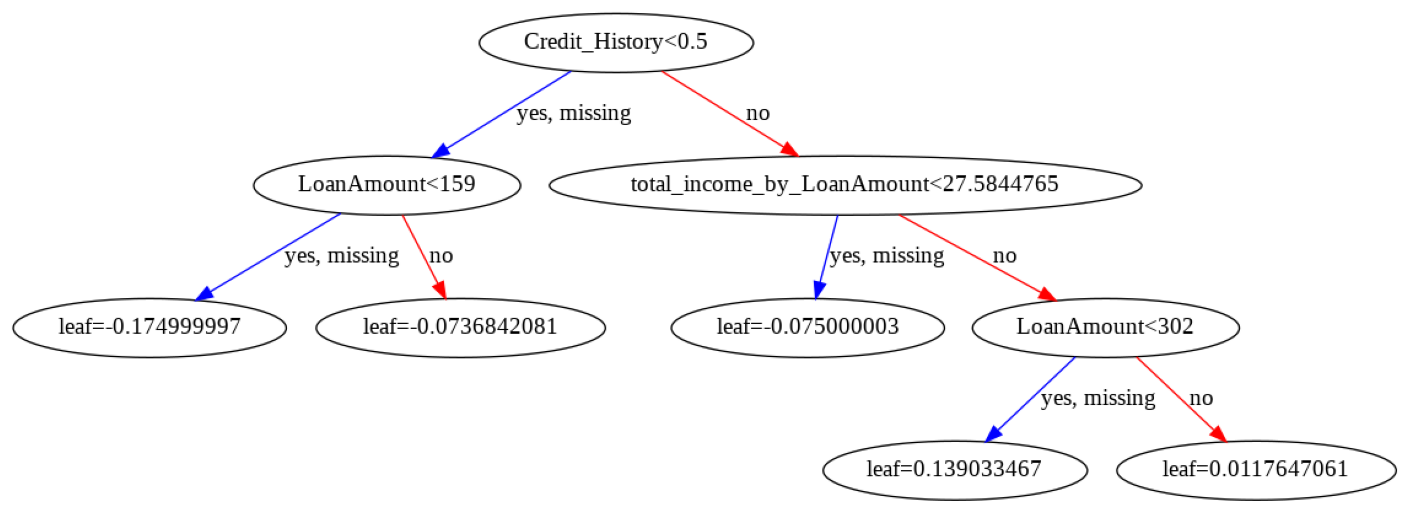

In [ ]:
plot_tree(xgb_1)
fig = plt.gcf()
fig.set_size_inches(25, 10)

In [ ]:
#tune ด้วย RandomizedSearchCV และ ทดสอบคะแนนด้วย Mean Squared Error
#RandomSearchCV
clf_rs = RandomizedSearchCV(estimator=xgb,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=3)
clf_rs.fit(X, y)

print("Best parameters:", clf_rs.best_params_)
print("Lowest MSE: ", (-clf_rs.best_score_)**(1/2.0))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END colsample_bytree=0.8, eta=0.01, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=3, subsample=0.8;, score=-0.163 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, eta=0.01, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=3, subsample=0.8;, score=-0.205 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, eta=0.01, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=3, subsample=0.8;, score=-0.205 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, eta=0.01, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=3, subsample=0.8;, score=-0.148 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, eta=0.01, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=3, subsample=0.8;, score=-0.156 total time=   0.0s
[CV 1/5] END colsample_bytree=1, eta=0.01, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=3, subsample=0.7;, score=-0.163 total time=   0.1s
[CV 2/5] E

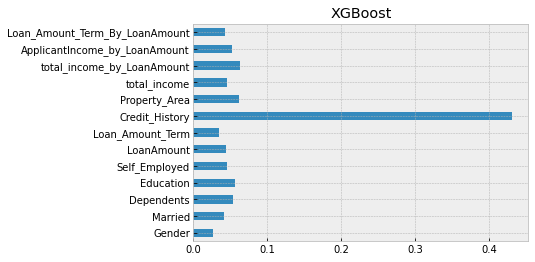

In [ ]:
#โมเดลที่มารองรับ Parameter จาก RandomizedSearchCV
rs_params = clf_rs.best_params_
xgb_2 = XGBClassifier(**rs_params)
xgb_2.fit(X_train , y_train)
pred_xgb_2 = xgb_2.predict(X_test)

predic_xgb_2 = xgb_2.predict(test_df)

#plot กราฟแสดง feature importances
importances_xgb_2 = pd.Series(xgb_2.feature_importances_,index=X.columns)
importances_xgb_2.plot.barh(title='XGBoost')

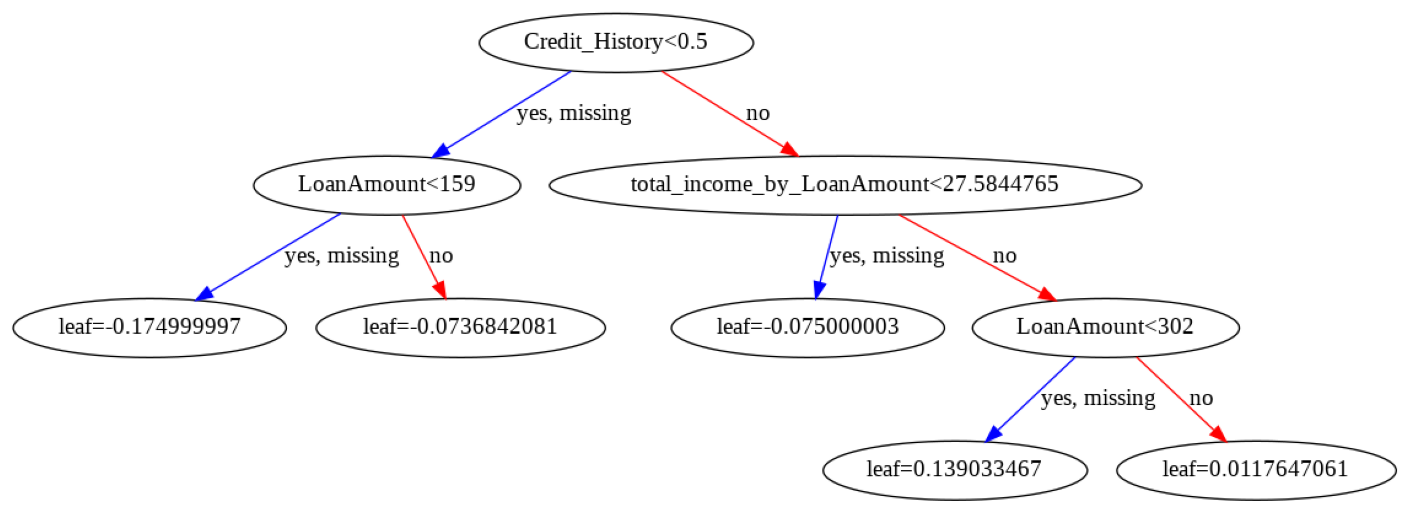

In [ ]:
plot_tree(xgb_2)
fig = plt.gcf()
fig.set_size_inches(25, 10)

# AUC score and Accuracy test

In [ ]:
#ทำการตรวจสอบความแม่นยำโดยใช้ area under the curve score และ Accuracy score
ml = [xgb,xgb_1, xgb_2,CB]
ml_name = ['Original xgb','xgb_GridSearch', 'xgb_RandomSearch','CB']
new_auc_score = []
Best_auc_score = 0
Best_auc_ML = 0

new_acc_score = []
Best_acc_score = 0
Best_acc_ML = 0
for i in ml:
  # predict probabilities foe each machine learning
  pred_prob = i.predict_proba(X_test)
  # roc curve for models
  fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)

  # roc curve for tpr = fpr 
  random_probs = [0 for i in range(len(y_test))]
  # auc scores
  auc_score = roc_auc_score(y_test, pred_prob[:,1])
  new_auc_score.append(auc_score)
  if auc_score > Best_auc_score:
    Best_auc_score = auc_score
    Best_auc_ML = i
  
  acc_Pred = i.predict(X_test)
  new_acc_score.append(accuracy_score(acc_Pred, y_test))
  if accuracy_score(acc_Pred, y_test) > Best_acc_score:
    Best_acc_score = accuracy_score(acc_Pred, y_test)
    Best_acc_ML = i


score_df = pd.DataFrame(list(zip(ml_name, new_auc_score, new_acc_score,)),columns=['Name','Auc Score', 'Accuracy'])
score_df

,Name,Auc Score,Accuracy
0,Original xgb,0.698116,0.796748
1,xgb_GridSearch,0.741243,0.829268
2,xgb_RandomSearch,0.741243,0.829268
3,CB,0.679775,0.813008


# Submission


สร้างไฟล์ Submission โดยใช้ Loan_ID จากไฟล์  Sample Submission ที่ทางเว็บให้มาและค่าที่ได้จากการ predict

In [ ]:
#XGBoost 
submission = pd.DataFrame({
        "Loan_ID": sample_sub["Loan_ID"],
        "Loan_Status": predic_xgb
    })
submission['Loan_Status'] = submission['Loan_Status'].replace(1,'Y')
submission['Loan_Status'] = submission['Loan_Status'].replace(0,'N')

submission.to_csv("results_xgb.csv", encoding='utf-8', index=False)
files.download("results_xgb.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

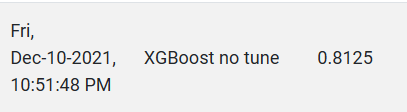

In [ ]:
#โมเดลหลัก : XGBoost ที่ tune ด้วย GridSearch
submission = pd.DataFrame({
        "Loan_ID": sample_sub["Loan_ID"],
        "Loan_Status": predic_xgb_1
    })
submission['Loan_Status'] = submission['Loan_Status'].replace(1,'Y')
submission['Loan_Status'] = submission['Loan_Status'].replace(0,'N')

submission.to_csv("results_xgb_1.csv", encoding='utf-8', index=False)
files.download("results_xgb_1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

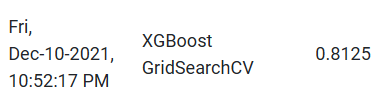

In [ ]:
#XGBoost ที่ tune ด้วย RandomSearch
submission = pd.DataFrame({
        "Loan_ID": sample_sub["Loan_ID"],
        "Loan_Status": predic_xgb_2
    })
submission['Loan_Status'] = submission['Loan_Status'].replace(1,'Y')
submission['Loan_Status'] = submission['Loan_Status'].replace(0,'N')

submission.to_csv("results_xgb_2.csv", encoding='utf-8', index=False)
files.download("results_xgb_2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


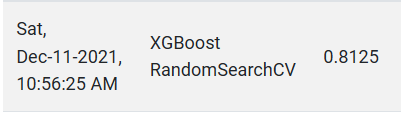
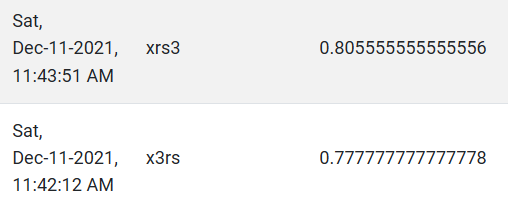

In [ ]:
#CatBoost
submission = pd.DataFrame({
        "Loan_ID": sample_sub["Loan_ID"],
        "Loan_Status": predic_CB
    })
submission['Loan_Status'] = submission['Loan_Status'].replace(1,'Y')
submission['Loan_Status'] = submission['Loan_Status'].replace(0,'N')

submission.to_csv("results_cb.csv", encoding='utf-8', index=False)
files.download("results_cb.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

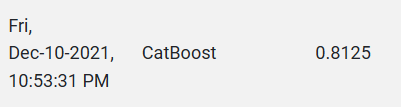

จากผลลัพธ์แสดงให้เห็นว่าเมื่อใช้ Parameter ชุดเดียวกัน  GridSearchCV ทำคะแนนเท่ากับรอบที่ดีที่สุด RandomSearchCV แต่คะแนนของทั้งสองไม่ได้เพิ่มขึ้นจากตัวโมเดลที่ไม่ได้รับการ tune เลย
</br> 
อีกทั้งเมื่อไม่ได้ tune XGBoost และ CatBoost คะแนนเทียบเท่ากัน